<a href="https://colab.research.google.com/github/glcn35/MATPLOTLIB-SEABORN/blob/main/Assignment_1_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [61]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>
TALİMATLAR

Cinsiyete göre kişi sayısı
silah öldür
Öldürülen insanların yaşı
Öldürülen insanların ırkı
Irklara Göre Öldürülen Kişiler (Pasta Grafiği)
En yaygın 15 Öldürülen kişinin Adı veya Soyadı

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [62]:
kill = pd.read_csv('/content/sample_data/PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [63]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [64]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [65]:
a=kill.gender.value_counts().index
a

Index(['M', 'F'], dtype='object')

In [66]:
b=kill.gender.value_counts().values
b

array([2428,  107])

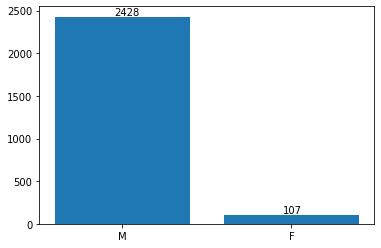

In [67]:
from IPython.core.pylabtools import figsize
fig,ax=plt.subplots(figsize=(6,4))
ax.bar(a,b)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

## 2: Plot 7 most common kill weapons

En yaygın 7 öldürme silahını çizin

In [68]:
kill["armed"].value_counts(dropna=False)[:7]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [69]:
a=kill["armed"].value_counts(dropna=False)[:7].index
a

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')

In [70]:
b=kill["armed"].value_counts(dropna=False)[:7].values
b

array([1398,  373,  177,  171,  117,  104,   18])

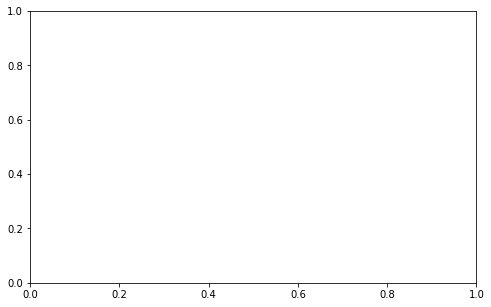

In [71]:
fig,ax= plt.subplots(figsize=(8,5))

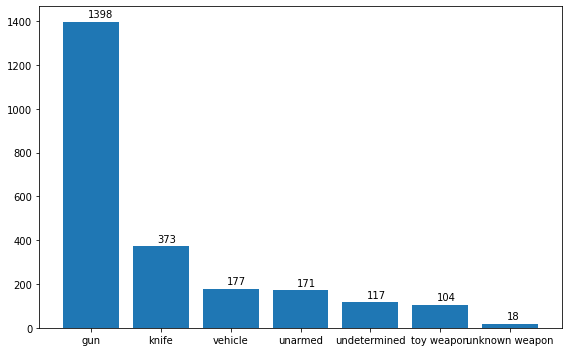

In [72]:
fig,ax= plt.subplots(figsize=(8,5))
ax.bar(a,b)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

plt.tight_layout()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

25 yaş altı ve 25 yaş üstü olmak üzere iki grupta öldürülen kişilerin yaşlarının parsel sayısı

In [73]:
kill[kill.age>25.0].shape[0]

1905

In [74]:
kill[kill.age<=25.0].shape[0]

553

In [75]:
kill.age.isnull().sum()

77

In [76]:
kill[kill.age.isnull()]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,29/08/15,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,17/09/15,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,12/10/15,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,24/10/15,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,2773,TK TK,12/07/17,shot,blunt object,NaN,M,NaN,Grover Beach,CA,False,other,Not fleeing,False
2496,2781,TK TK,15/07/17,shot,gun,NaN,M,NaN,Arlington,TX,False,attack,Foot,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,M,NaN,San Antonio,TX,False,attack,Not fleeing,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False


In [77]:
kill.duplicated(["id","name"]).sum()

0

In [78]:
kill["age_cat"]= kill.age.transform(lambda x: "above25" if x>25 else "below25")
kill["age_cat"]

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    below25
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [79]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [80]:
kill["age_cat"].value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

In [81]:
a=kill["age_cat"].value_counts().index
a

Index(['above25', 'below25'], dtype='object')

In [82]:
b=kill["age_cat"].value_counts().values
b

array([1905,  630])

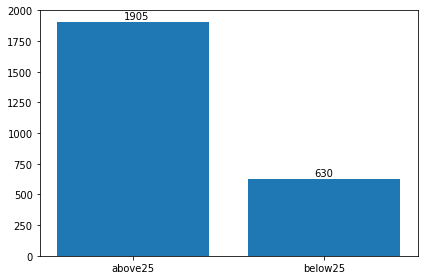

In [83]:
fig,ax= plt.subplots(figsize=(6,4))
ax.bar(a,b)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20))
plt.tight_layout()
plt.show()

## 4: Plot number of killed poeple by race

In [84]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [85]:
a=kill.race.value_counts().index
a

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [86]:
b=kill.race.value_counts().values
b

array([1201,  618,  423,   39,   31,   28])

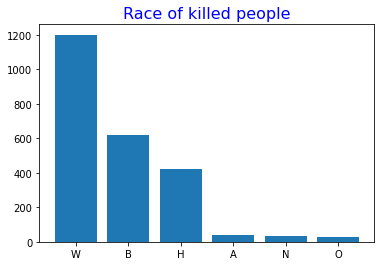

In [87]:
fig, ax= plt.subplots(figsize=(6,4))
ax.bar(a,b)
ax.set_title("Race of killed people",c="b",fontsize = 16)
plt.show()

## 5: Killed People According to Races (Pie Chart)

In [88]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [89]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [90]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [91]:
kill.race.value_counts(dropna=False).index

Index(['W', 'B', 'H', nan, 'A', 'N', 'O'], dtype='object')

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [92]:
kill.shape

(2535, 15)

In [93]:
kill.dropna(axis=0, how="any", thresh=None)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,below25
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,below25
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [94]:
kill=kill.dropna(axis=0, how="any", thresh=None)
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,below25
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,below25
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [95]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [96]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [97]:
a=kill.race.value_counts().index
a

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [98]:
b=kill.race.value_counts().values
b

array([1168,  592,  401,   36,   29,   28])

In [99]:
kill.race.value_counts(normalize=True)

W    0.518190
B    0.262644
H    0.177906
A    0.015972
N    0.012866
O    0.012422
Name: race, dtype: float64

In [100]:
b= kill.race.value_counts(normalize=True).values
b

array([0.51818988, 0.26264419, 0.17790594, 0.01597161, 0.01286602,
       0.01242236])

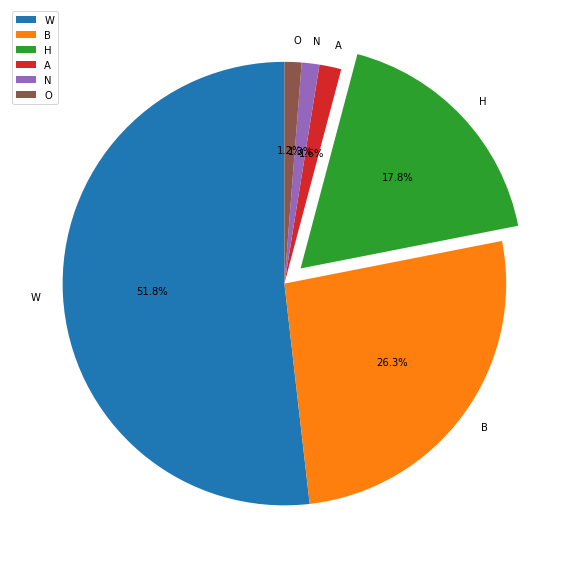

In [101]:
plt.figure(figsize=(15,8))
plt.pie(b,labels=a ,explode=[0,0,0.1,0,0,0], startangle=90, autopct="%.1f%%")
plt.tight_layout()
plt.legend()
plt.show()